In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [9]:
bli = pd.read_csv('/Users/oabuhamdan/Downloads/BLI_13122021035942629.csv', thousands=',')
gdp = pd.read_csv('/Users/oabuhamdan/Downloads/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
country_stats = prepare_country_stats(bli, gdp)
X= np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

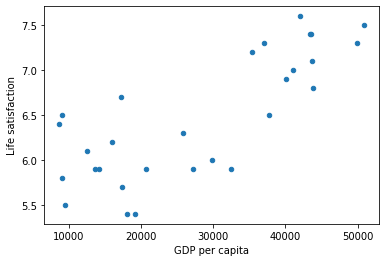

In [13]:
country_stats.plot(kind = 'scatter', x='GDP per capita' , y='Life satisfaction')

In [18]:
# model_based learning
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
model.predict([[22587]])

array([[6.25984414]])

In [20]:
# instance-based learning
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors= 3)
model.fit(X, y)
model.predict([[22587]])

array([[5.86666667]])